<p align='center'>
<img src ="https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png">
<p>


![Driveguard](Logos-ImagenesPIDA2\Driveguard.logo.jpg)       ![ALPLV](Logos-ImagenesPIDA2\1630597122772.jpg)



# Exploratory data analysis

In [21]:
import matplotlib.pyplot as plt 
import pandas as pd
from IPython.display import Image
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import geopandas as gpd
from shapely.geometry import Point


In [22]:
df = pd.read_csv('homicidiosfinal.csv')

In [23]:
df['ID_'] = range(1, len(df) + 1)

In [24]:

def clean_data(df):
    # Drop column: 'Unnamed: 0'
    df = df.drop(columns=['Unnamed: 0'])
    return df

df = clean_data(df.copy())
df.head(2)

,ID,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA_SINIESTRO,HORA_SINIESTRO,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,semestre,ID_
0,1,Conductor,Moto,Masculino,19,2016-01-01 00:00:00,1,2016-01-01,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.475340,-34.687570,Moto-Auto,Auto,1,1
1,2,Conductor,Auto,Masculino,70,2016-01-02 00:00:00,1,2016-01-02,01:15:00,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.508775,-34.669777,Auto-Pasajeros,Pasajeros,1,2


In [25]:

def clean_data(df):
    # Drop column: 'ID'
    df = df.drop(columns=['ID'])
    # Rename column 'ID_' to 'ID'
    df = df.rename(columns={'ID_': 'ID'})
    return df

df = clean_data(df.copy())
df.head(2)

,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA_SINIESTRO,HORA_SINIESTRO,LUGAR_DEL_HECHO,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,semestre,ID
0,Conductor,Moto,Masculino,19,2016-01-01 00:00:00,1,2016-01-01,04:00:00,Av Piedra Buena Y Av Fernandez De La Cruz,Avenida,8,-58.475340,-34.687570,Moto-Auto,Auto,1,1
1,Conductor,Auto,Masculino,70,2016-01-02 00:00:00,1,2016-01-02,01:15:00,Av Gral Paz Y Av De Los Corrales,Gral Paz,9,-58.508775,-34.669777,Auto-Pasajeros,Pasajeros,1,2


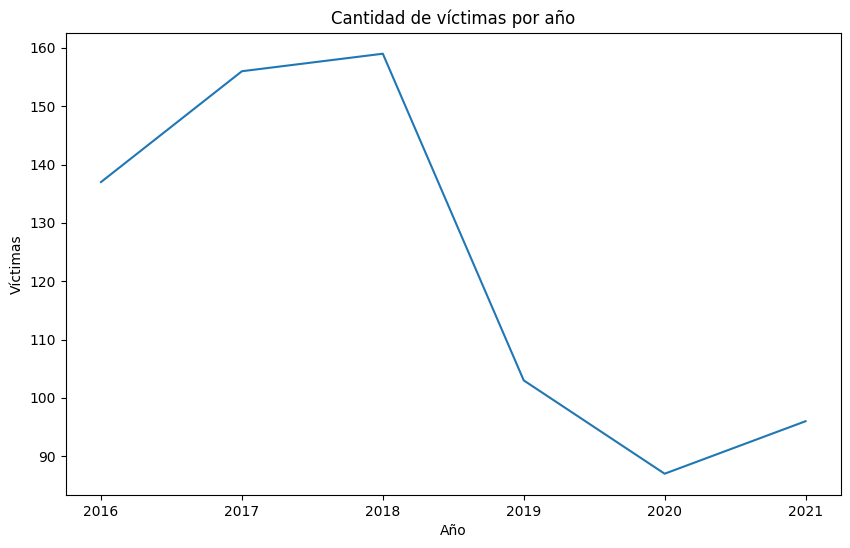

In [26]:
#Convertir la columna 'FECHA_SINIESTRO' a datetime
df['FECHA_SINIESTRO'] = pd.to_datetime(df['FECHA_SINIESTRO'])
#Extraer el año de la fecha
df['Year'] = df['FECHA_SINIESTRO'].dt.year
#Agrupar por año y sumar la cantidad de víctimas
grouped = df.groupby('Year')['N_VICTIMAS'].sum()
# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(grouped.index, grouped.values)
plt.xlabel('Año')
plt.ylabel('Víctimas')
plt.title('Cantidad de víctimas por año')
plt.show()

## Rol de víctimas fatales en el año 2021

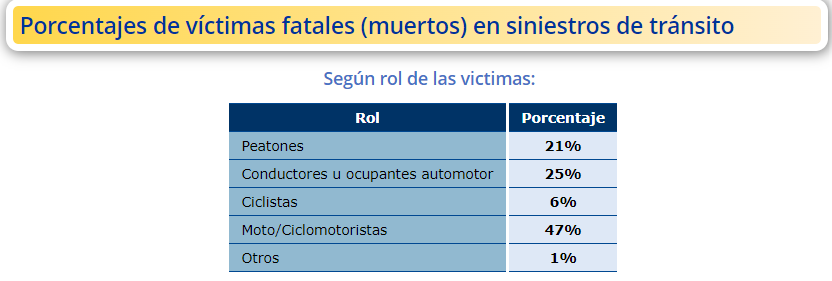

In [27]:
#Imagen que contextualiza el rol de víctimas en el año 2021
Image("Logos-ImágenesPIDA2\Vícitmas.png")

### Contextualizamos los accidentes que más porcentaje de víctimas fatales poseen:

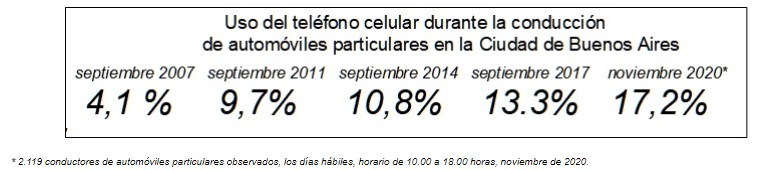

In [28]:
#Uso del teléfono celular durante la conducción
Image("Logos-ImágenesPIDA2\Celular.jpg")

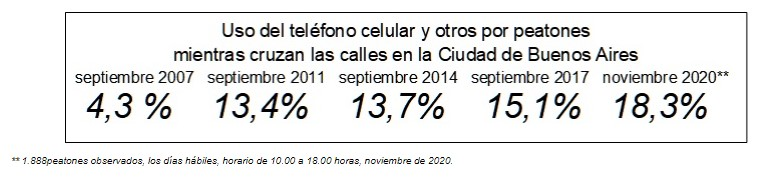

In [29]:
#Peatones usando celular

Image("Logos-ImágenesPIDA2\CelularPeatones.jpg")

## *Porcentaje de víctimas por rol a lo largo de los años en nuestros datos* 

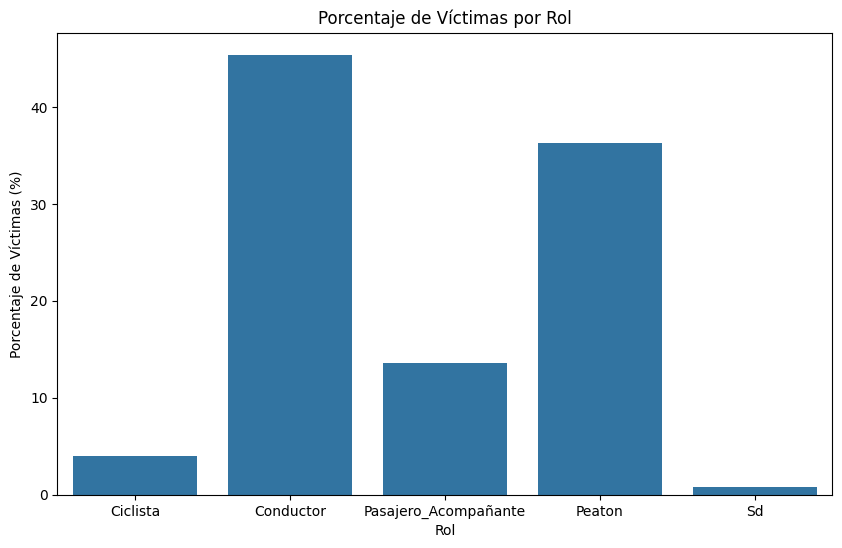

In [30]:

# Calcular el total de N_VICTIMAS
total_victimas = df['N_VICTIMAS'].sum()
# Agrupar por ROL y calcular la suma de N_VICTIMAS para cada ROL
grouped = df.groupby('ROL')['N_VICTIMAS'].sum()
# Calcular el porcentaje de N_VICTIMAS para cada ROL
grouped = grouped / total_victimas * 100
# Convertir la serie en un DataFrame
df_grouped = grouped.reset_index()
# Crear el gráfico de tabla
plt.figure(figsize=(10,6))
sns.barplot(x='ROL', y='N_VICTIMAS', data=df_grouped)
plt.xlabel('Rol')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Rol')
plt.show()

### Observaciones:

***Más del 40% del total de víctimas de accidentes provistos en nuestros datos, son representados por conductores, siendo el segundo lugar el peaton y tercero pasajero_acompañante***


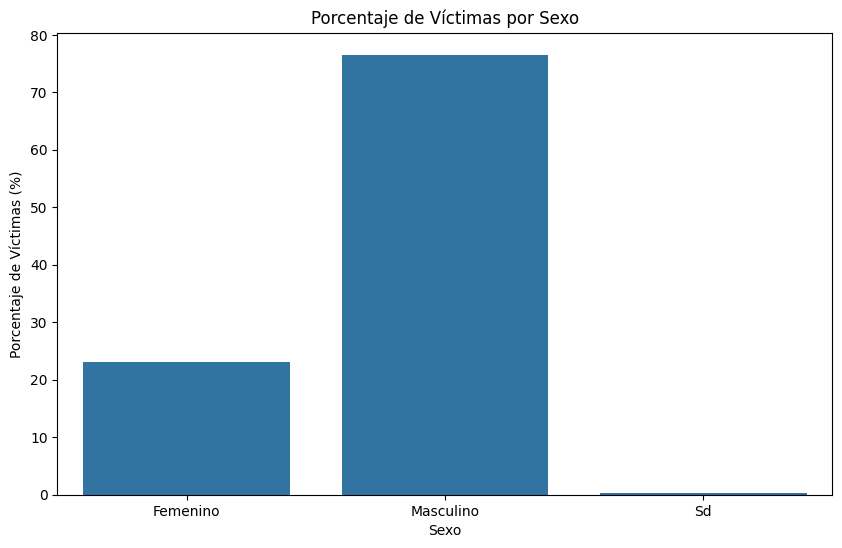

In [31]:

# Calcular el total de VICTIMAS X GENERO
total_victimas = df['N_VICTIMAS'].sum()
# Agrupar por ROL y calcular la suma de N_VICTIMAS para cada ROL
grouped = df.groupby('SEXO')['N_VICTIMAS'].sum()
# Calcular el porcentaje de N_VICTIMAS para cada ROL
grouped = grouped / total_victimas * 100
# Convertir la serie en un DataFrame
df_grouped = grouped.reset_index()
# Crear el gráfico de tabla
plt.figure(figsize=(10,6))
sns.barplot(x='SEXO', y='N_VICTIMAS', data=df_grouped)
plt.xlabel('Sexo')
plt.ylabel('Porcentaje de Víctimas (%)')
plt.title('Porcentaje de Víctimas por Sexo')
plt.show()

### Fallecidos
 
En el año *2018* se registraron **1.344** personas fallecidas por siniestros viales de los cuales 1.078
fueron **varones** y 266 **mujeres**, ***el número de varones fallecidos es 4 veces superior al de mujeres.***

En cuanto a la edad, el *46,4%* de los fallecidos tenían ***entre 15 y 34 años***, en este grupo etario
***los varones que fallecen multiplican por 6 al número de mujeres***.

El **53,6%** de los fallecidos fueron los propios conductores de los vehículos. Los peatones
fallecidosfueron el ***13,6%***.

Los vehículos con mayor proporción de fallecidos fueron las *motocicletas* con el *39,3%*, en su
mayoría varones y jóvenes.

Más de la mitad de los siniestros con víctimas fatales ocurrieron en calles del ejido urbano
(*51,3%*).

*Sobre los denominados usuarios vulnerables, peatones y ciclistas, muestran un
comportamiento similar al de las motos con mayor cantidad de víctimas fatales en calles urbanas*

Entre los que viajan en automóvil, el ***68,5%*** de los casos de víctimas fatales ocurrieron en
***rutas (nacionales o provinciales), autopistas y autovías.***

En promedio, los sábados y domingos fallecieron 5 personas por día, mientras que de lunes a
viernes los promedios son de 3 fallecidos por día.


### Lesionados

El número de lesionados en incidentes viales en la Provincia ascendió a 44.268 en 2018. De
éstos, casi dos tercios fueron varones y un tercio mujeres.

El comportamiento etario de los lesionados sigue un patrón similar al de los fallecidos en este
tipo de eventos, la tercera parte de todos los lesionadosson varones jóvenes de 15 a 34 años (33,4%)

En 2018 se lesionaron alrededor de 122 personas por día, mientras que no se observan
diferencias sustanciales entre días lunes a viernes o sábados y domingos, aunque son mayores las
lesiones en los fines de semana.

***Al realizar gráficos sobre edad por rol de la victima, o edad sobre número de víctimas, el rango del eje X que representa la edad es poco legible, vamos a crear una columna "rango_edad" para poder visualizar mejor estos gráficos***

In [32]:
# Creamos los rangos de edad
bins = [0, 20, 40, 60, 90]
labels = ['1-20', '21-40', '41-60', '61-90']
df['Rango_Edad'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=False)


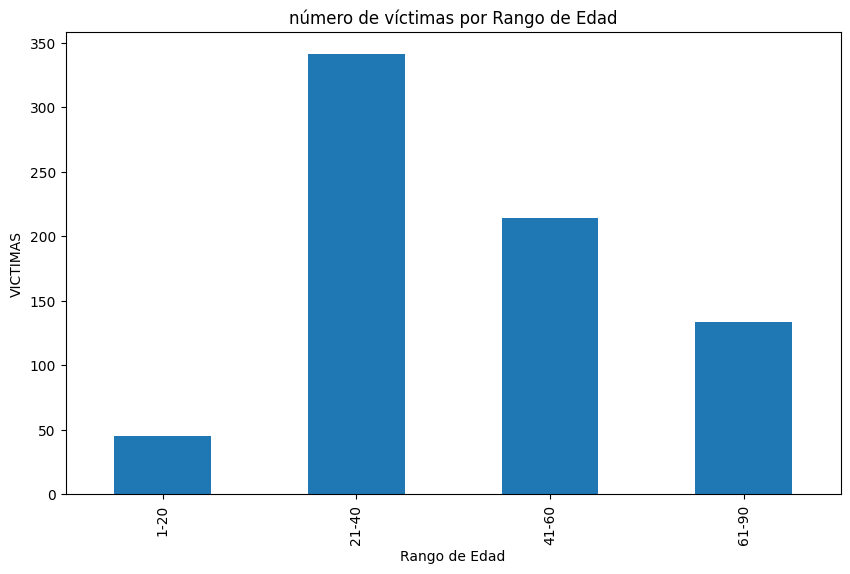

In [33]:
# Creamos el primer gráfico: N_VICTIMAS por Rango_Edad
plt.figure(figsize=(10,6))
df.groupby('Rango_Edad')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Rango de Edad')
plt.ylabel('VICTIMAS')
plt.title('número de víctimas por Rango de Edad')
plt.show()

***Podemos observar que el rango de edad por accidentes es dominado por las personas que se encuentran en un rango de 21 a 40 años, siendo en su mayoría conductores masculinos***

<Figure size 1000x600 with 0 Axes>

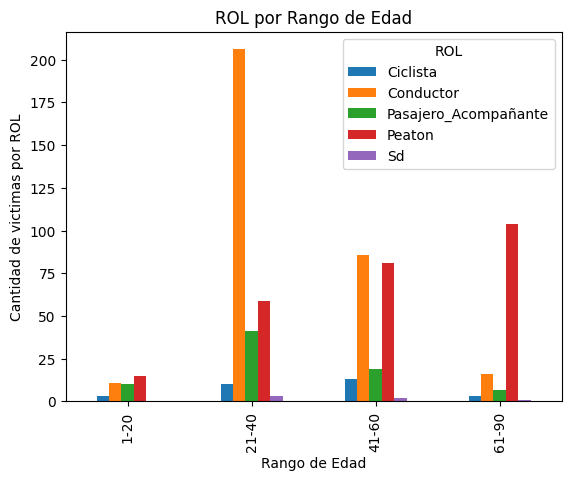

In [34]:
# Creamos el segundo gráfico: ROL por Rango_Edad
plt.figure(figsize=(10,6))
df.groupby(['Rango_Edad','ROL']).size().unstack().plot(kind='bar',stacked=False)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de victimas por ROL')
plt.title('ROL por Rango de Edad')
plt.show()

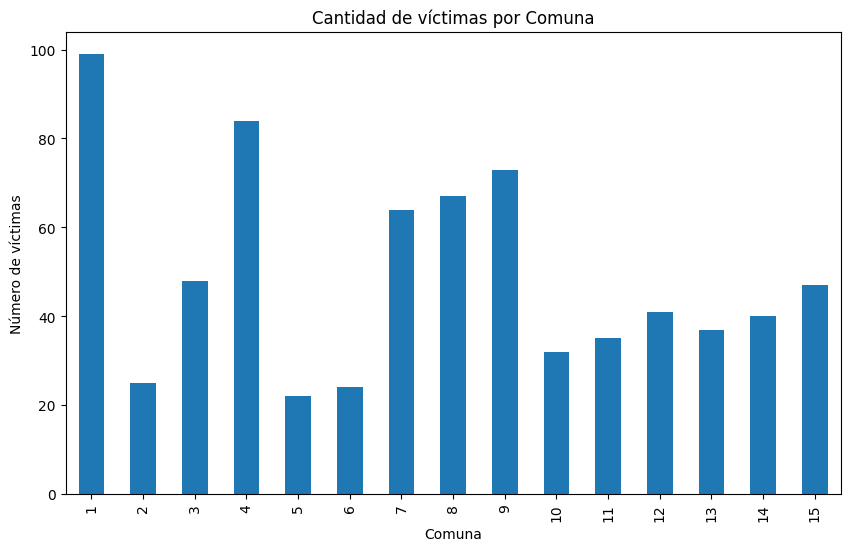

In [38]:
# Creamos el primer gráfico: N_VICTIMAS por COMUNA
plt.figure(figsize=(10,6))
df.groupby('COMUNA')['N_VICTIMAS'].sum().plot(kind='bar')
plt.xlabel('Comuna')
plt.ylabel('Número de víctimas')
plt.title('Cantidad de víctimas por Comuna')
plt.show()

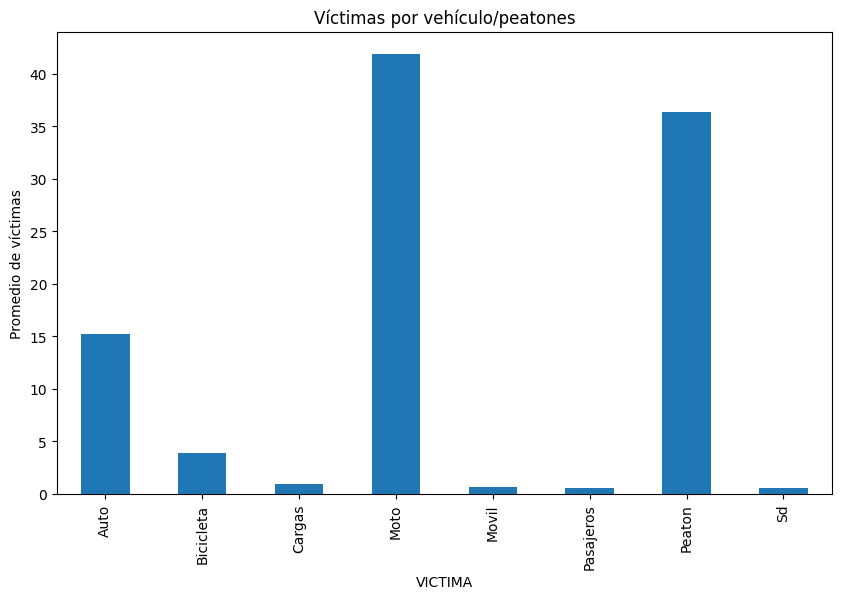

In [39]:
# Creamos el segundo gráfico: Porcentaje de N_VICTIMAS por VICTIMA
plt.figure(figsize=(10,6))
(df.groupby('VICTIMA')['N_VICTIMAS'].sum() / df['N_VICTIMAS'].sum() * 100).plot(kind='bar')
plt.xlabel('VICTIMA')
plt.ylabel('Promedio de víctimas')
plt.title('Víctimas por vehículo/peatones')
plt.show()

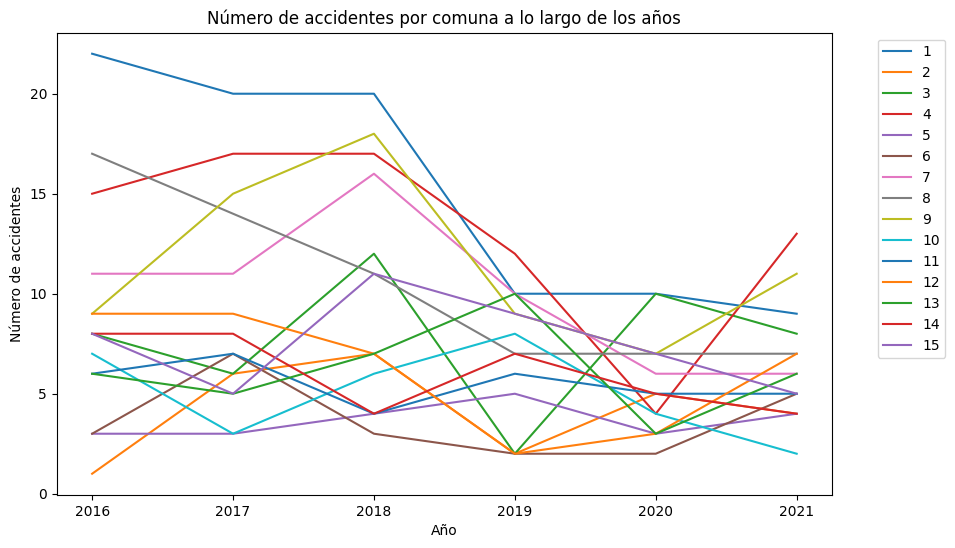

In [37]:
# Convertimos la columna 'FECHA_SINIESTRO' a datetime
df['FECHA_SINIESTRO'] = pd.to_datetime(df['FECHA_SINIESTRO'])

# Extraemos el año de la fecha
df['Year'] = df['FECHA_SINIESTRO'].dt.year

# Agrupamos por año y comuna y contamos el número de accidentes
grouped = df.groupby(['Year', 'COMUNA']).size()

# Desapilamos el DataFrame agrupado para tener una columna por comuna
grouped = grouped.unstack()

# Creamos el gráfico de líneas
plt.figure(figsize=(10,6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], label=column)
plt.xlabel('Año')
plt.ylabel('Número de accidentes')
plt.title('Número de accidentes por comuna a lo largo de los años')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

*Realizando la comparativa entre 2018 y 2020, podemos observar que hubo una perdida de vidas humanas del 57% en 2020 respecto al 2018, en 2020, 3138 personas perdieron la vida mientras que en 2018, fueron 5493*   

Ésto podría deberse a la implementación de restricciones a la hora de conducir por la pandemia COVID-19 en el año 2020, el cual mostró disminución de víctimas fatales debido a la baja conducción de vehículos y circulación de peatones(*Véase en el readme el video:* ***CESVI argentina nos cuenta sobre su análisis de siniestros en 2020***)

En el video proporcionado por CESVI, se relata justamente éste hecho, la reduccion de víctimas fatales por el aislamiento social, aún asi, se deja notar la falta de responsabilidad de los pocos conductores que podían estar en su vehículo en esos tiempos, viendo que no habia tráfico, varios optaron por la "libertad de conducción" y ha habido accidentes, pero en menor cantidad a lo promediado anteriormente.